# Constrained Inversion, basics

In this example, we consider as inple constrained optimization problem an look at bot SPG and PQN algorithms

In [1]:
using SlimOptim, LinearAlgebra, PyPlot

# Problem definition 
We define a standard least square problem wuth constraints on the solution

In [2]:
n = 512
A = randn(n, n);

### Setup constraints

In [3]:
# x has to be be bigger than 2
function proj(x)
    xp = deepcopy(x)
    xp[xp .< 2] .= 2
    return xp
end

proj (generic function with 1 method)

In [4]:
x_true = 2 .+ randn(n)
x_true = proj(x_true);
b = A*x_true;

# Define in place objective and gradient functions

In [5]:
function f(x)
    return .5*norm(A*x - b)^2
end

function g!(g, x)
     g .= A'*(A*x - b)
end

function fg!(g, x)
    f = .5*norm(A*x - b)^2
    g .= A'*(A*x - b)
    return f
end

fg! (generic function with 1 method)

# Inversion

In [6]:
spgopt = spg_options(maxIter=200)
pqnopt = pqn_options(maxIter=200)

SlimOptim.PQN_params(1, 1.0f-5, 1.0f-7, 200, 0.0001f0, 10, false, true, false, 1.0f-6, 1.0f-7, 10, false, 20)

In [7]:
solspg = spg(f, g!, fg!, zeros(n), proj, spgopt);

Running SPG...
Number of objective function to store: 2
Using  spectral projection : true
Maximum number of iterations: 200
SPG optimality tolerance: 1.00e-05
SPG progress tolerance: 1.00e-07
 Iteration   FunEvals  GradEvals Projections     Step Length           alpha    Function Val        Opt Cond
         0          0          0          0     0.00000e+00     0.00000e+00     6.43586e+04     1.74158e+03
         1          2          2          6     1.00000e+00     1.14838e-04     5.16928e+04     1.56670e+03
         2          3          3         10     1.00000e+00     9.11654e-04     9.55011e+03     4.37705e+02
         3          4          4         14     1.00000e+00     9.36248e-04     4.28123e+03     3.22887e+02
         4          5          5         18     1.00000e+00     1.06696e-03     2.38016e+03     1.71788e+02
         5          6          6         22     1.00000e+00     1.21052e-03     1.53794e+03     1.98450e+02
         6          7          7         26     1.0

In [8]:
solpqn = pqn(f, g!, fg!, zeros(n), proj, pqnopt);

Running PQN...
Number of L-BFGS Corrections to store: 10
Spectral initialization of SPG: 1
Maximum number of SPG iterations: 10
SPG optimality tolerance: 1.00e-06
SPG progress tolerance: 1.00e-07
PQN optimality tolerance: 1.00e-05
PQN progress tolerance: 1.00e-07
Quadratic initialization of line search: 0
Maximum number of iterations: 200
 Iteration   FunEvals  GradEvals Projections     Step Length    Function Val        Opt Cond
         0          0          0          0     0.00000e+00     6.43586e+04     1.74158e+03
         1          5          2          6     1.00000e-03     1.12088e+04     5.00193e+02
         2          6          3         37     1.00000e+00     4.54231e+03     2.98662e+02
         3          7          4         70     1.00000e+00     2.06001e+03     1.57737e+02
         4          8          5        103     1.00000e+00     9.82998e+02     1.00808e+02
         5          9          6        136     1.00000e+00     4.56067e+02     8.50505e+01
         6    

# Plot solutions

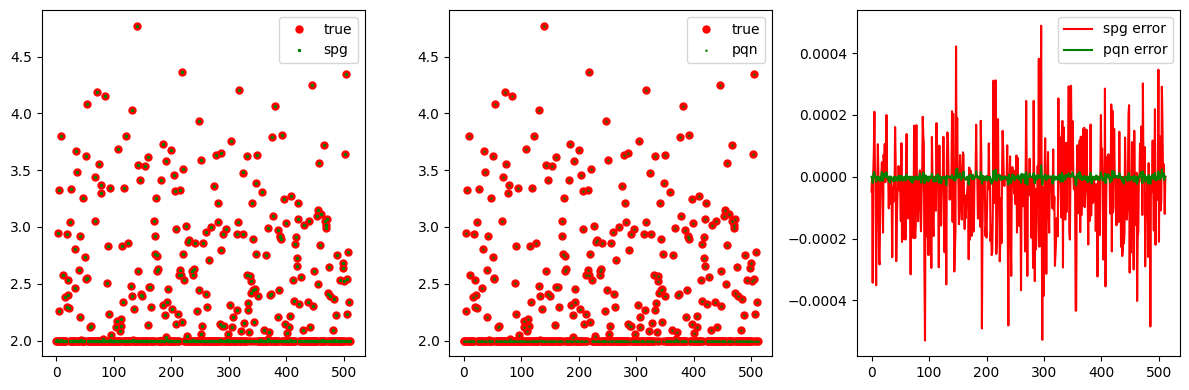

In [9]:
figure(figsize=(12, 4))
subplot(131)
plot(x_true, label="true", "ro", markersize=5)
plot(solspg.x, label="spg", "g*", markersize=2)
legend()
subplot(132)
plot(x_true, label="true", "ro", markersize=5)
plot(solpqn.x, label="pqn", "g^", markersize=1)
legend()
subplot(133)
plot(x_true - solspg.x, label="spg error", "r", markersize=5)
plot(x_true - solpqn.x, label="pqn error", "g", markersize=1)
legend()
tight_layout()

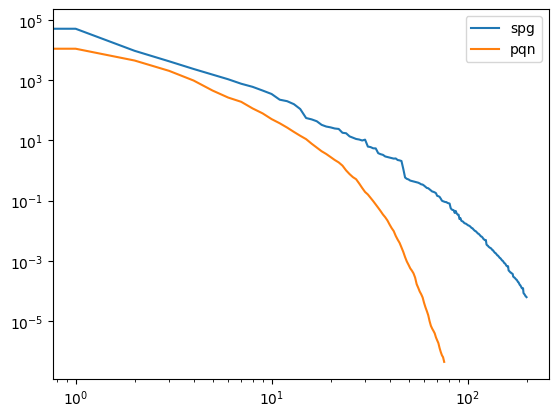

PyObject <matplotlib.legend.Legend object at 0x14372af40>

In [10]:
loglog(solspg.ϕ_trace, label="spg")
loglog(solpqn.ϕ_trace, label="pqn")
legend()